# Interpolacja wielomianowa - interpolacja Newtona

Wielomian interpolacyjny Newtona:

$$p(x) = f[x_0]+f[x_o , x_1](x-x_0) + ... + f[x_0 , ... , x_n](x-x_0)*...*(x-x_{n-1})$$

Iloraz róznicowy n-tego rzędu:

$$f[x_0 , ... , x_n] = \sum_{i=0}^n \frac{f(x_i)}{w^\prime(x_i)} = \frac{f[x_1 , ... , x_n] - f[x_0 , ... , x_{n-1}]}{x_n - x_0}$$

przy czym  $f[x_k] = f_k , k = 0,1,...,n$

### Ćwiczenie 3

Znając $cos x $ dla $x=0,\frac{\pi}{4},\frac{\pi}{2}$, wyznacz przybliżoną wartość $cos \frac{\pi}{8}$

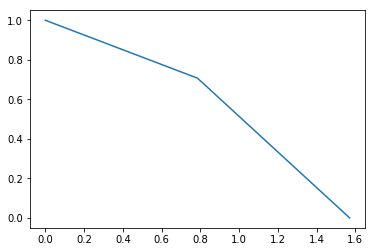

In [94]:
import numpy as np
import matplotlib.pyplot as plt

pi = math.pi

szukana = pi / 8;

x_i = [0, pi/4, pi/2]
y_i = [1, math.sqrt(2)/2, 0]
#x_i = [-1,0,4,5]
#y_i = [1,0,-1,0]


n = len(x_i)

fig, ax = plt.subplots()
line1 = ax.plot(x_i,y_i)
plt.show()


In [95]:
def checkX_s(x,n):
    return False if (szukana < x[0] or szukana > x[n - 1]) else True

print(checkX_s(x_i,n))

True


In [96]:
def coeff(x,y):
    n = len(x)
    IR = np.zeros(n)
    
    for i in range(0,n):
        IR[i] = y[i]
        
    for i in range(1,n):
        for k in range(n-1,i,-1):
            try:
                IR[k] = float(IR[k] - IR[k - 1]) / float(x[k] - y[k - i])
            except:
                print(f'{IR[k]} - {IR[k-1]} / 0 !')
    return IR

IR = coeff(x_i,y_i)
print(IR)

[ 1.          0.70710678 -0.81870481]


In [97]:
def P(x, IR):
    multiplier = 1
    n = len(x)
    Px_s = IR[0];
    for i in range(1,n):
        multiplier *= (szukana - x[i - 1])
        Px_s += (IR[i] * multiplier)
    return Px_s

print(f'cos ( pi / 8) = {P(x_i,IR)}')


cos ( pi / 8) = 1.4039347547059773


Sprawdzając przy pomocy kalkulatora $ cos \frac{\pi}{8} = 0.9999765....$

Dodajmy zatem więcej węzłów


In [98]:
x_i2 = [-pi/2, -pi/4, 0, pi/4, pi/2]
y_i2 = [1, math.sqrt(2)/2,1,math.sqrt(2)/2, 0]
nodes = []
multiplier = 1

    

IR = coeff(x_i2,y_i2)
cos = P(x_i2,IR)
print(cos)


33.036937299927814
